In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import interpolate
import seaborn as sns
import copy
from copy import deepcopy
import geopandas as gpd

# Better plots
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 18,  # Larger font
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

root_path = os.path.join(os.path.dirname(os.getcwd()), 'FuelPoverty_data')

# Scotland

In [14]:
# heating proportion
census_root_path = os.path.join(os.path.dirname(os.getcwd()), "FuelPoverty_data", "Census")

# scotland data needs to be processed
scot_householdno_df = pd.read_csv(os.path.join(census_root_path, "Scotland", "QS415SC.csv"), header = 3).iloc[1:-3,:2]
for i in range(1):
    scot_householdno_df[scot_householdno_df.columns[i+1]] = pd.to_numeric(scot_householdno_df.iloc[:,i+1], errors='coerce').replace(np.nan, 0)

scot_zonelookup_df = pd.read_csv(os.path.join(census_root_path, "Scotland", "DataZone2011lookup.csv"))
# process scot_heat_prop_df so that it becomes data per intermediate zone
scot_zonelookup_dict = {scot_zonelookup_df.iloc[i]["DZ2011_Code"]: scot_zonelookup_df.iloc[i]["IZ2011_Code"] for i in range(len(scot_zonelookup_df))}
scot_zonelookup_dict["Scotland"] = "Scotland"
scot_householdno_df["IZ_code"] = scot_householdno_df.iloc[:,0].map(scot_zonelookup_dict)
scot_householdno_df.drop(columns = ["Unnamed: 0"], inplace = True)
scot_householdno_df = scot_householdno_df.groupby(by="IZ_code").sum().reset_index()

In [15]:
scot_householdno_df["All occupied household spaces"].sum()

2372777.0

## Intermiediate Zone

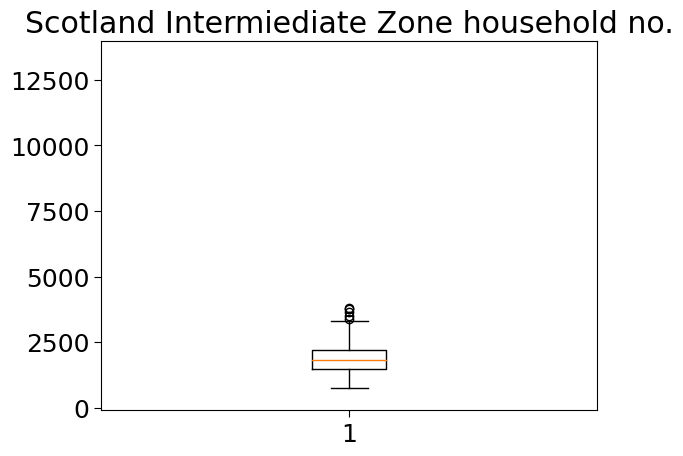

Total number of IZ is 1279
mean is 1855.1813917122752, median is 1802.0


In [16]:
plt.boxplot(scot_householdno_df["All occupied household spaces"])
plt.title("Scotland Intermiediate Zone household no.")
plt.ylim([-100,14000])
plt.show()

print(f"Total number of IZ is {len(scot_householdno_df)}")
mean = scot_householdno_df["All occupied household spaces"].mean()
median = scot_householdno_df["All occupied household spaces"].median()
print(f"mean is {mean}, median is {median}")

## Ward

In [17]:
scot_zonelookup_df

,DZ2011_Code,DZ2011_Name,IZ2011_Code,IZ2011_Name,MMWard_Code,MMWard_Name,LA_Code,LA_Name,SPC_Code,SPC_Name,...,UR2_Code,UR2_Name,UR3_Code,UR3_Name,UR6_Code,UR6_Name,UR8_Code,UR8_Name,Country_Code,Country_Name
0,S01006506,Culter - 01,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
1,S01006507,Culter - 02,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
2,S01006508,Culter - 03,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
3,S01006509,Culter - 04,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
4,S01006510,Culter - 05,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,S01013477,Broxburn South - 06,S02002513,Broxburn South,S13002821,"Broxburn, Uphall and Winchburgh",S12000040,West Lothian,S16000128,Linlithgow,...,1,Rest of Scotland,1,Rest of Scotland,2,Other Urban Areas,2,Other Urban Areas,S92000003,Scotland
6972,S01013478,Broxburn East - 01,S02002514,Broxburn East,S13002821,"Broxburn, Uphall and Winchburgh",S12000040,West Lothian,S16000128,Linlithgow,...,1,Rest of Scotland,1,Rest of Scotland,2,Other Urban Areas,2,Other Urban Areas,S92000003,Scotland
6973,S01013479,Broxburn East - 02,S02002514,Broxburn East,S13002821,"Broxburn, Uphall and Winchburgh",S12000040,West Lothian,S16000128,Linlithgow,...,1,Rest of Scotland,1,Rest of Scotland,2,Other Urban Areas,2,Other Urban Areas,S92000003,Scotland
6974,S01013480,Broxburn East - 03,S02002514,Broxburn East,S13002821,"Broxburn, Uphall and Winchburgh",S12000040,West Lothian,S16000128,Linlithgow,...,1,Rest of Scotland,1,Rest of Scotland,2,Other Urban Areas,2,Other Urban Areas,S92000003,Scotland


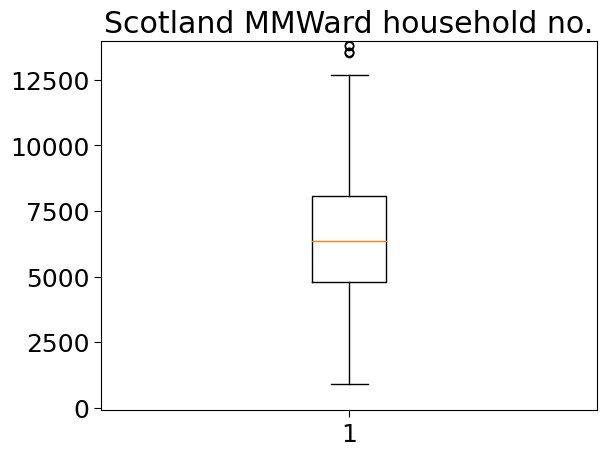

Total number of MMW is 349
mean is 6798.787965616046, median is 6372.0


In [18]:
# process scot_heat_prop_df so that it becomes data per intermediate zone
scot_zonelookup_dict = {scot_zonelookup_df.iloc[i]["IZ2011_Code"]: scot_zonelookup_df.iloc[i]["MMWard_Code"] for i in range(len(scot_zonelookup_df))}
scot_zonelookup_dict["Scotland"] = "Scotland"

scot_householdno_MMWdf = scot_householdno_df.copy()

scot_householdno_MMWdf["MMW_code"] = scot_householdno_MMWdf.iloc[:,0].map(scot_zonelookup_dict)
scot_householdno_MMWdf = scot_householdno_MMWdf.groupby(by="MMW_code").sum(numeric_only = True).reset_index()

plt.boxplot(scot_householdno_MMWdf["All occupied household spaces"])
plt.title("Scotland MMWard household no.")
plt.ylim([-100,14000])
plt.show()

print(f"Total number of MMW is {len(scot_householdno_MMWdf)}")
mean = scot_householdno_MMWdf["All occupied household spaces"].mean()
median = scot_householdno_MMWdf["All occupied household spaces"].median()
print(f"mean is {mean}, median is {median}")

# England

## MSOA

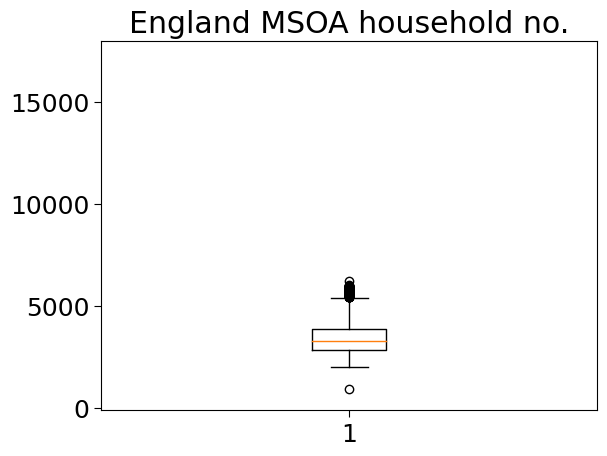

Total number of MSOA is 6856
mean is 3418.33780630105, median is 3308.0


In [19]:
eng_houseno_df = pd.read_csv(os.path.join(census_root_path, "2021Census_MSOA_householdno.csv"))
eng_houseno_df = eng_houseno_df[eng_houseno_df["Middle Layer Super Output Areas Code"].str.contains("E")]
eng_houseno_df["Observation"] = 1*eng_houseno_df["Observation"]
plt.boxplot(eng_houseno_df["Observation"])
plt.title("England MSOA household no.")
plt.ylim([-100,18000])
plt.show()

print(f"Total number of MSOA is {len(eng_houseno_df)}")
mean = eng_houseno_df["Observation"].mean()
median = eng_houseno_df["Observation"].median()
print(f"mean is {mean}, median is {median}")

In [20]:
eng_houseno_df["Observation"].sum()

23436124

## Westminster Parliamentary constituencies

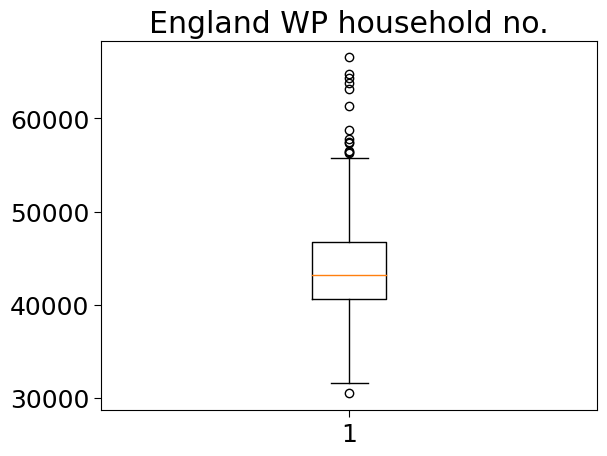

Total number of WP is 533
mean is 43970.12007504691, median is 43261.0


In [21]:
eng_houseno_df = pd.read_csv(os.path.join(census_root_path, "2021Census_WP_householdno.csv"))
eng_houseno_df = eng_houseno_df[eng_houseno_df["Westminster Parliamentary constituencies Code"].str.contains("E")]

plt.boxplot(eng_houseno_df["Observation"])
plt.title("England WP household no.")
# plt.ylim([-100,18000])
plt.show()

print(f"Total number of WP is {len(eng_houseno_df)}")
mean = eng_houseno_df["Observation"].mean()
median = eng_houseno_df["Observation"].median()
print(f"mean is {mean}, median is {median}")

## Lower tier local authorities

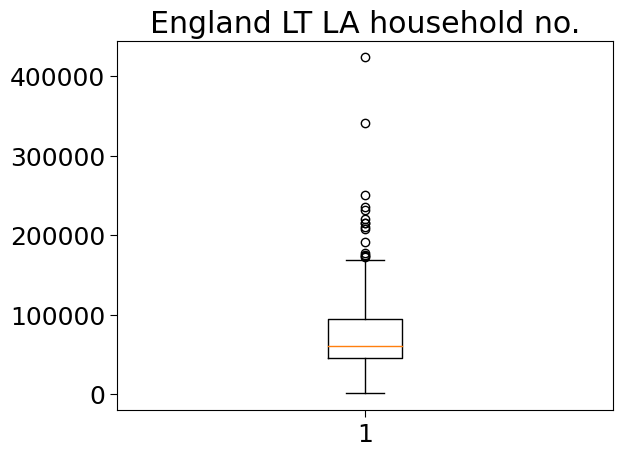

Total number of LT LA is 309
mean is 75844.91585760519, median is 60047.0


In [22]:
eng_houseno_df = pd.read_csv(os.path.join(census_root_path, "2021Census_LTLA_householdno.csv"))
eng_houseno_df = eng_houseno_df[eng_houseno_df["Lower tier local authorities Code"].str.contains("E")]

plt.boxplot(eng_houseno_df["Observation"])
plt.title("England LT LA household no.")
# plt.ylim([-100,18000])
plt.show()

print(f"Total number of LT LA is {len(eng_houseno_df)}")
mean = eng_houseno_df["Observation"].mean()
median = eng_houseno_df["Observation"].median()
print(f"mean is {mean}, median is {median}")